# Gunjan Chakraborty

# 22MSRDS007

In [1]:
import numpy as np # linear algebra
import pandas as pd 
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.style.use('dark_background')
import numpy as np
import xgboost as xgb
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

**Read Housing Data**

In [2]:
data=pd.read_csv("D:\Chools\DAY_14\HousingData.csv")
display(data.head())
display(data.columns)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

# **Data Preprocessing:**

In [3]:
display(data.describe())
display(data.info())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


None

In [4]:
#Fill null values with average of each column
data["CRIM"].fillna(data["CRIM"].mean(),inplace=True)
data["ZN"].fillna(data["ZN"].mean(),inplace=True)
data["INDUS"].fillna(data["INDUS"].mean(),inplace=True)
data["CHAS"].fillna(data["CHAS"].mean(),inplace=True)
data["AGE"].fillna(data["AGE"].mean(),inplace=True)
data["LSTAT"].fillna(data["LSTAT"].mean(),inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


# **EDA**

In [5]:
# Set a colorful palette
sns.set_palette("viridis")

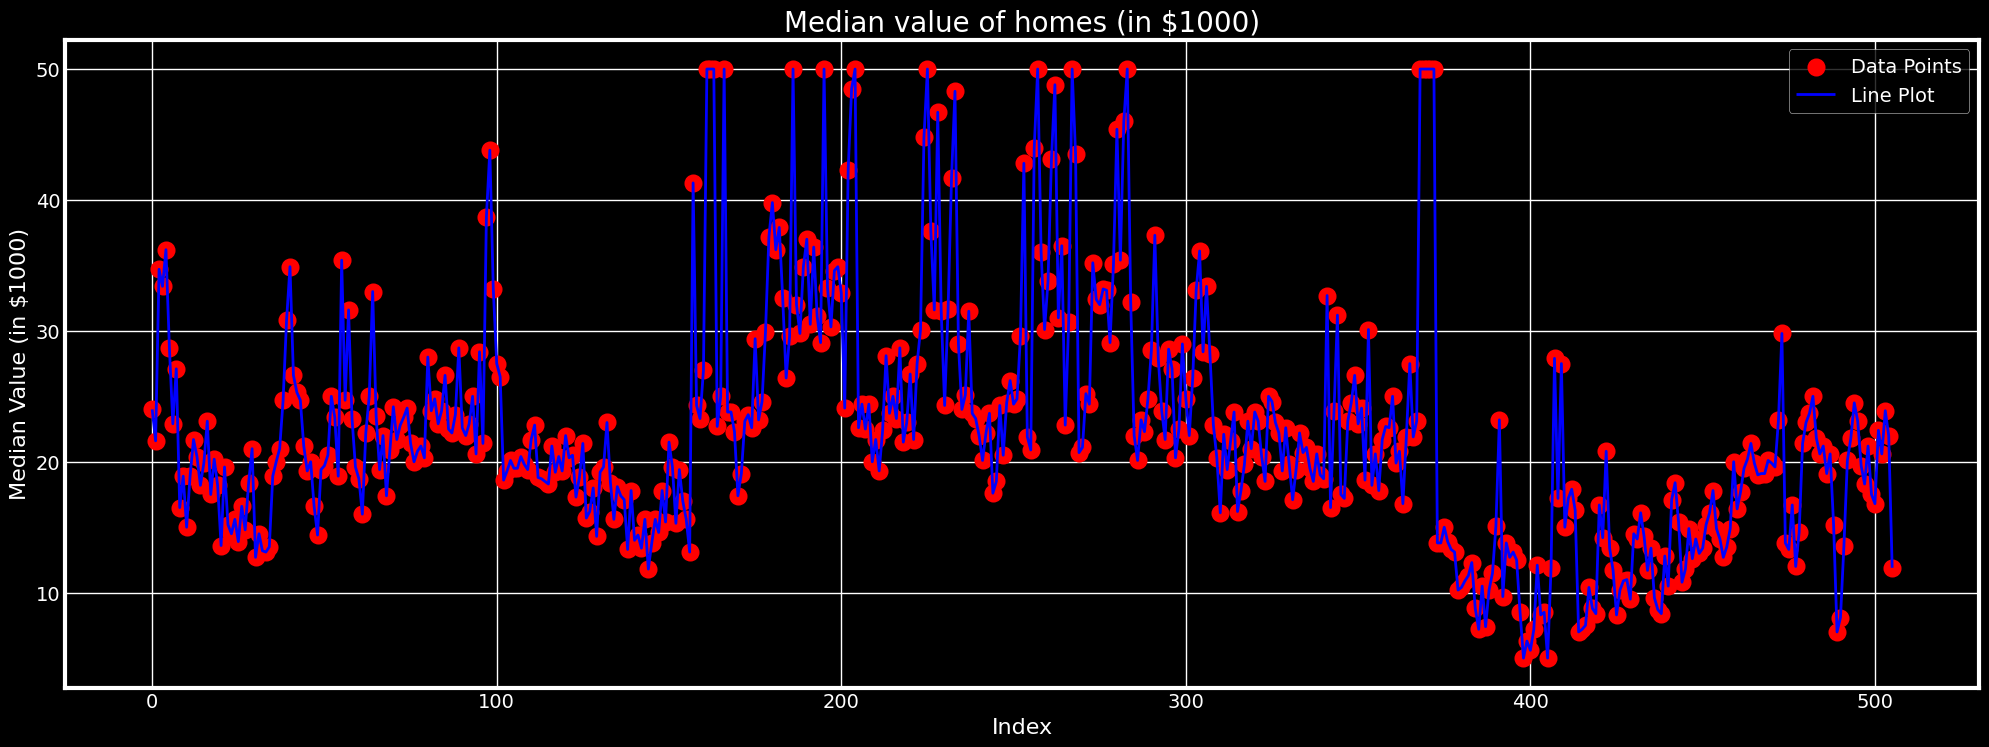

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(22,8))

# Scatter plot with red color and larger markers
plt.scatter(data.index, data["MEDV"], color="red", lw=3, label='Data Points', s=100)

# Line plot with blue color and thicker line
plt.plot(data.index, data["MEDV"], color="blue", lw=2, label='Line Plot')

plt.title("Median value of homes (in $1000)", fontsize=20)  # Increase title font size
plt.xlabel("Index", fontsize=16)  # Label for x-axis
plt.ylabel("Median Value (in $1000)", fontsize=16)  # Label for y-axis
plt.grid(True)

# Add legend
plt.legend(fontsize=14)

plt.show()


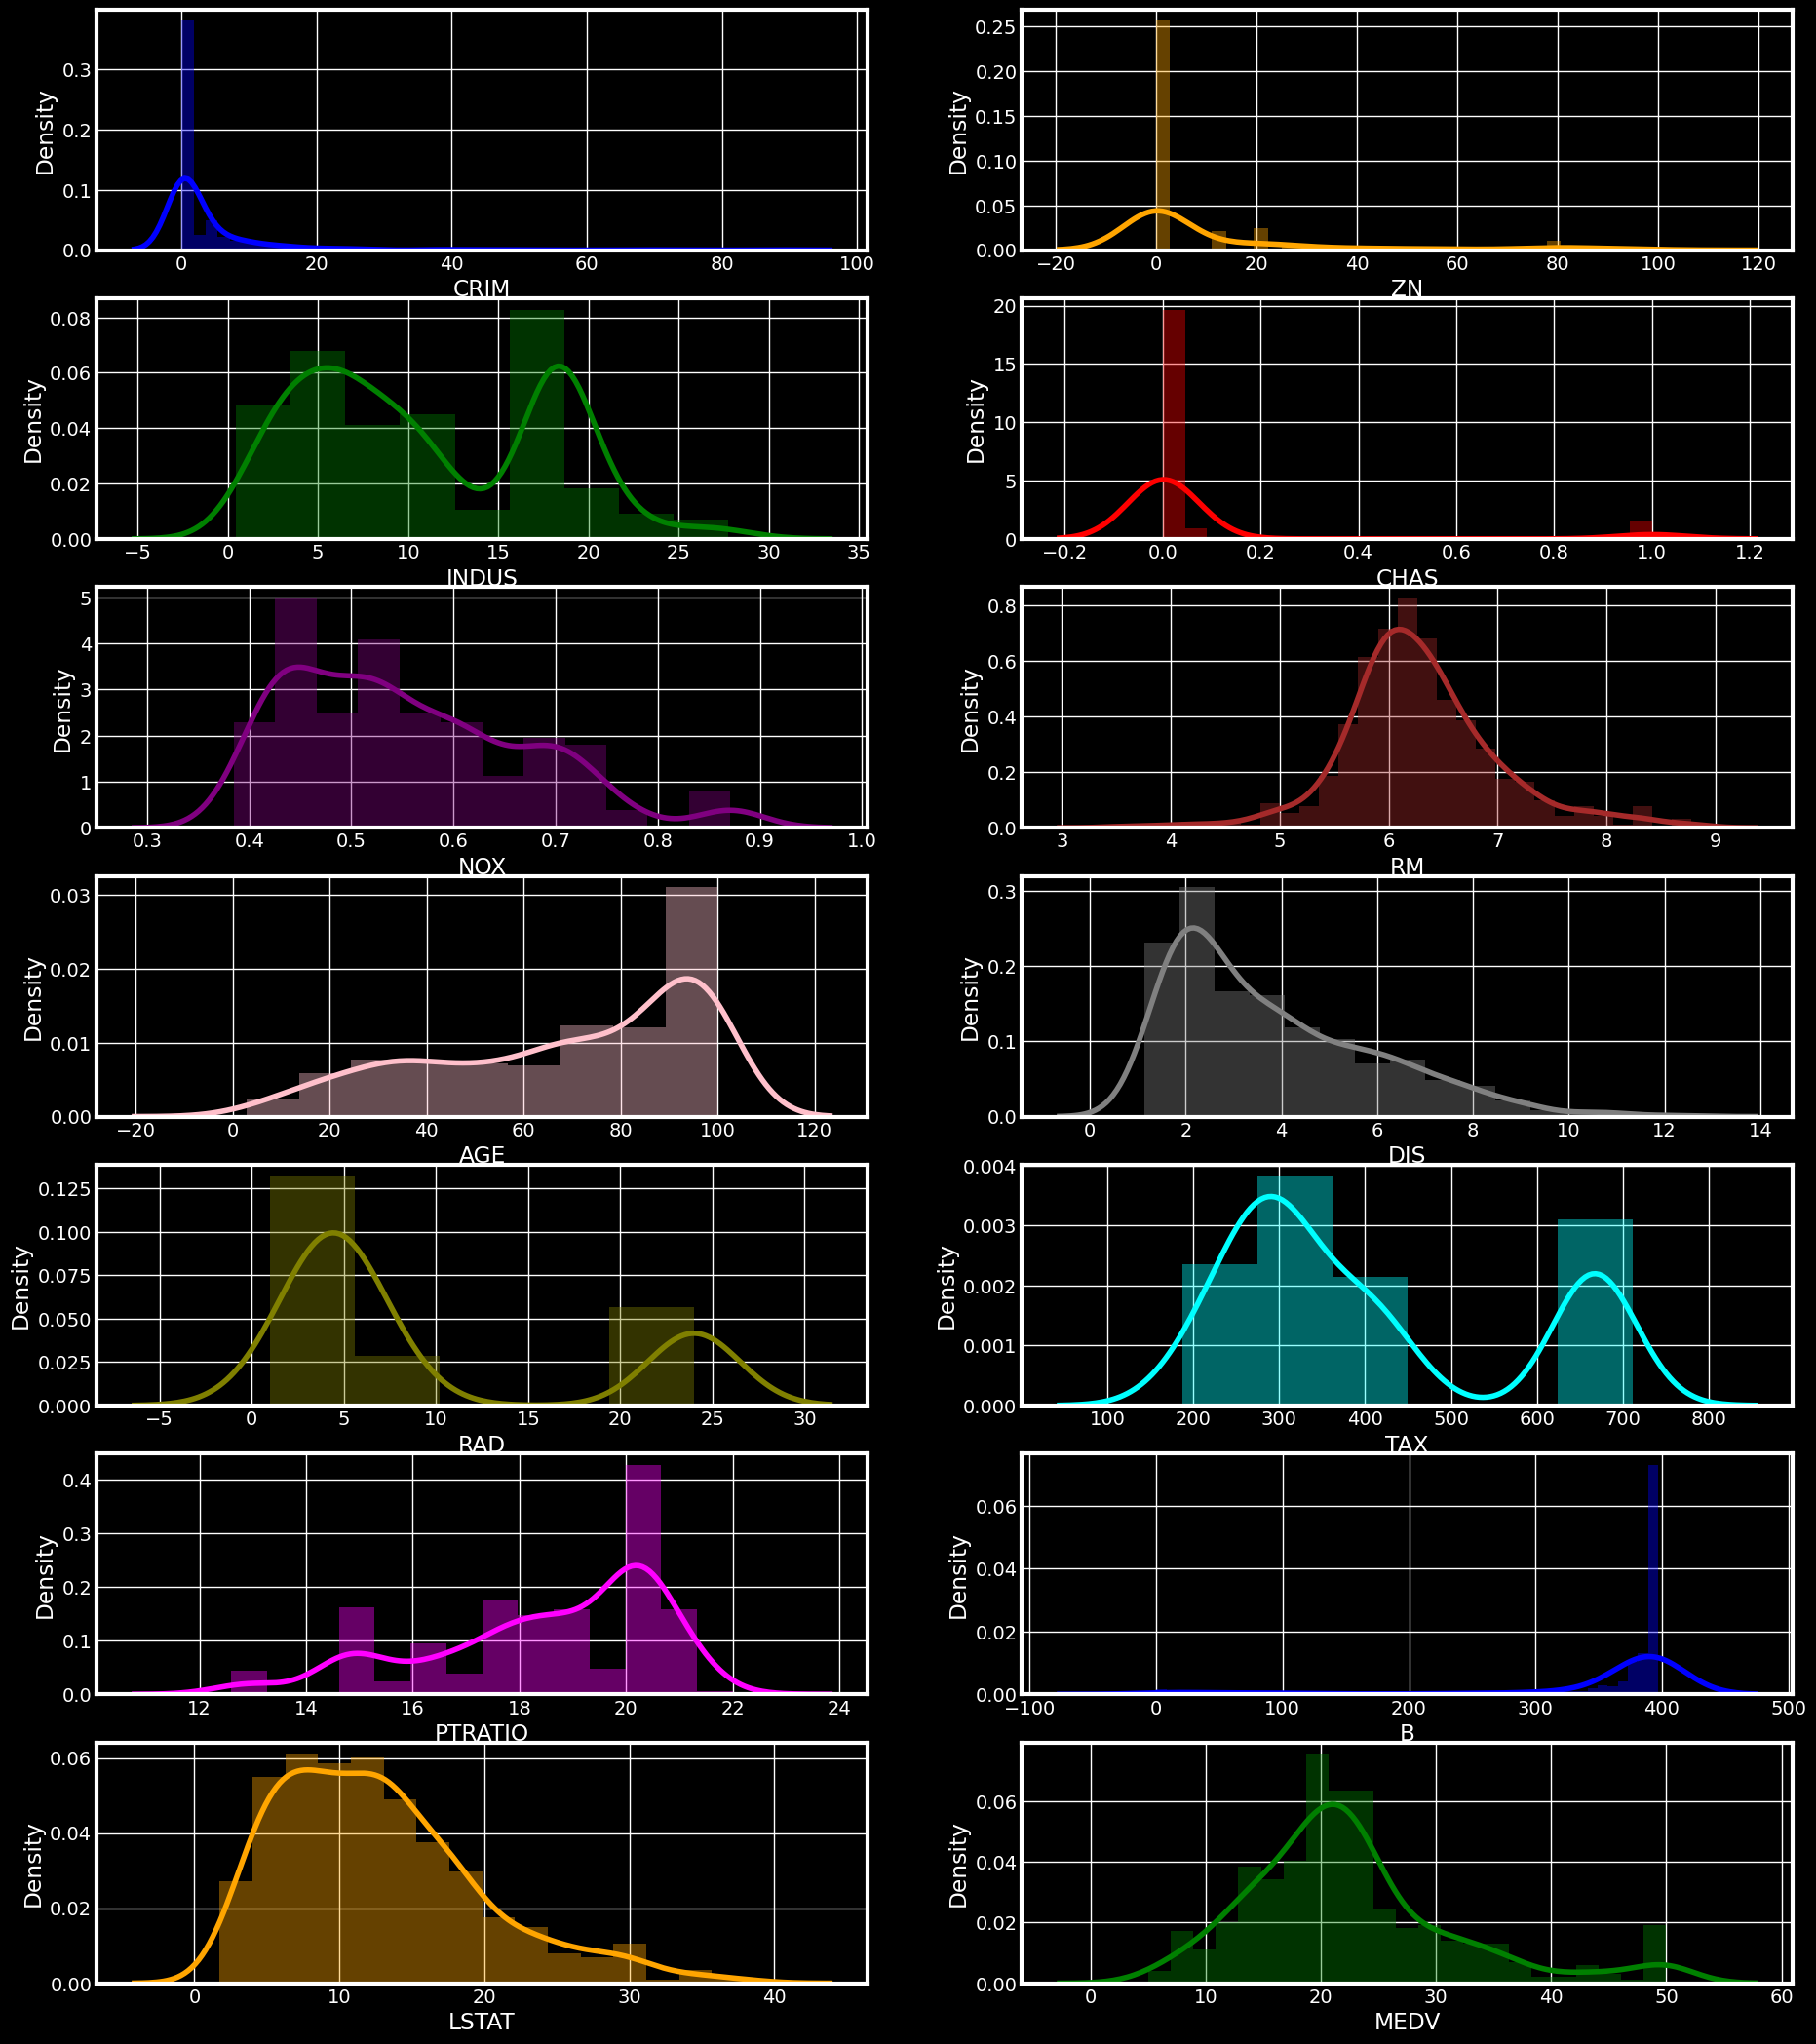

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(7, 2, figsize=(20, 25))
k = 0
columns = list(data.columns)
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta']

for i in range(7):
    for j in range(2):
        sns.distplot(data[columns[k]], ax=ax1[i][j], color=colors[k % len(colors)])  # Use modulo to repeat colors
        ax1[i][j].grid(True)
        k += 1

plt.show()


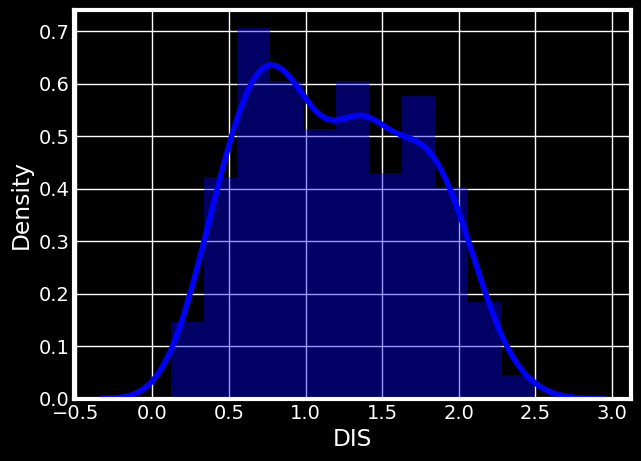

In [8]:
def log_transform(col):
    return np.log(col[0])

data["DIS"]=data[["DIS"]].apply(log_transform, axis=1)
#Plot
sns.distplot(data["DIS"], color = 'blue')
plt.grid(True)
plt.show()

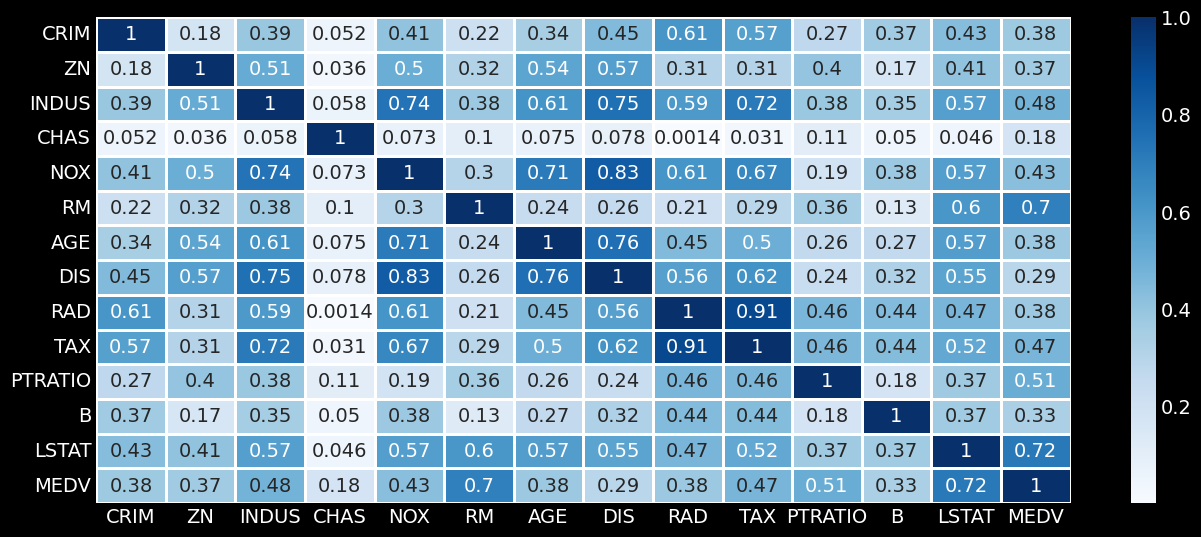

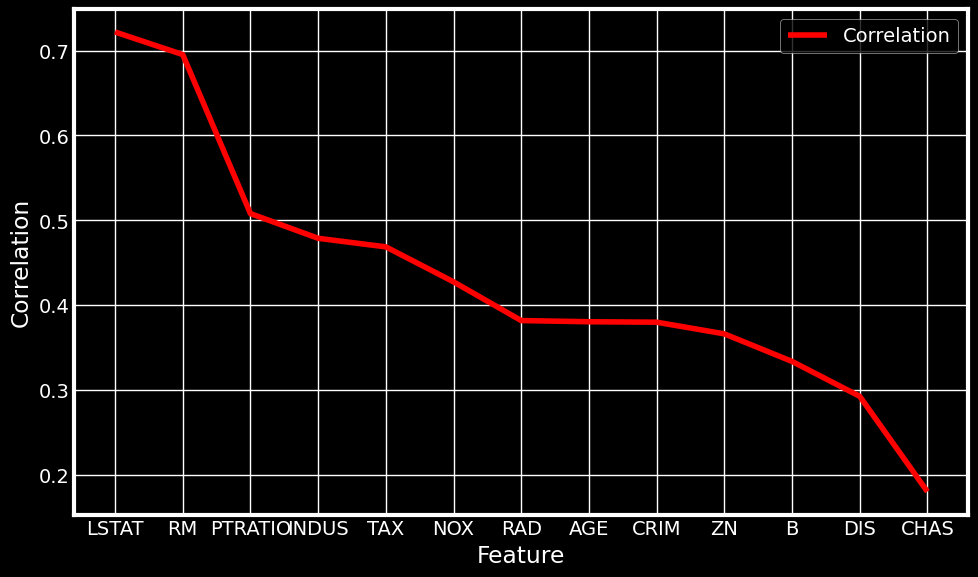

In [9]:
plt.figure(figsize=(14,6))
corr=abs(data.corr())
sns.heatmap(corr,annot=True,linewidth=1,cmap="Blues")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(corr["MEDV"].sort_values(ascending=False)[1:],label="Correlation",color="red")
plt.ylabel("Correlation")
plt.xlabel("Feature")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

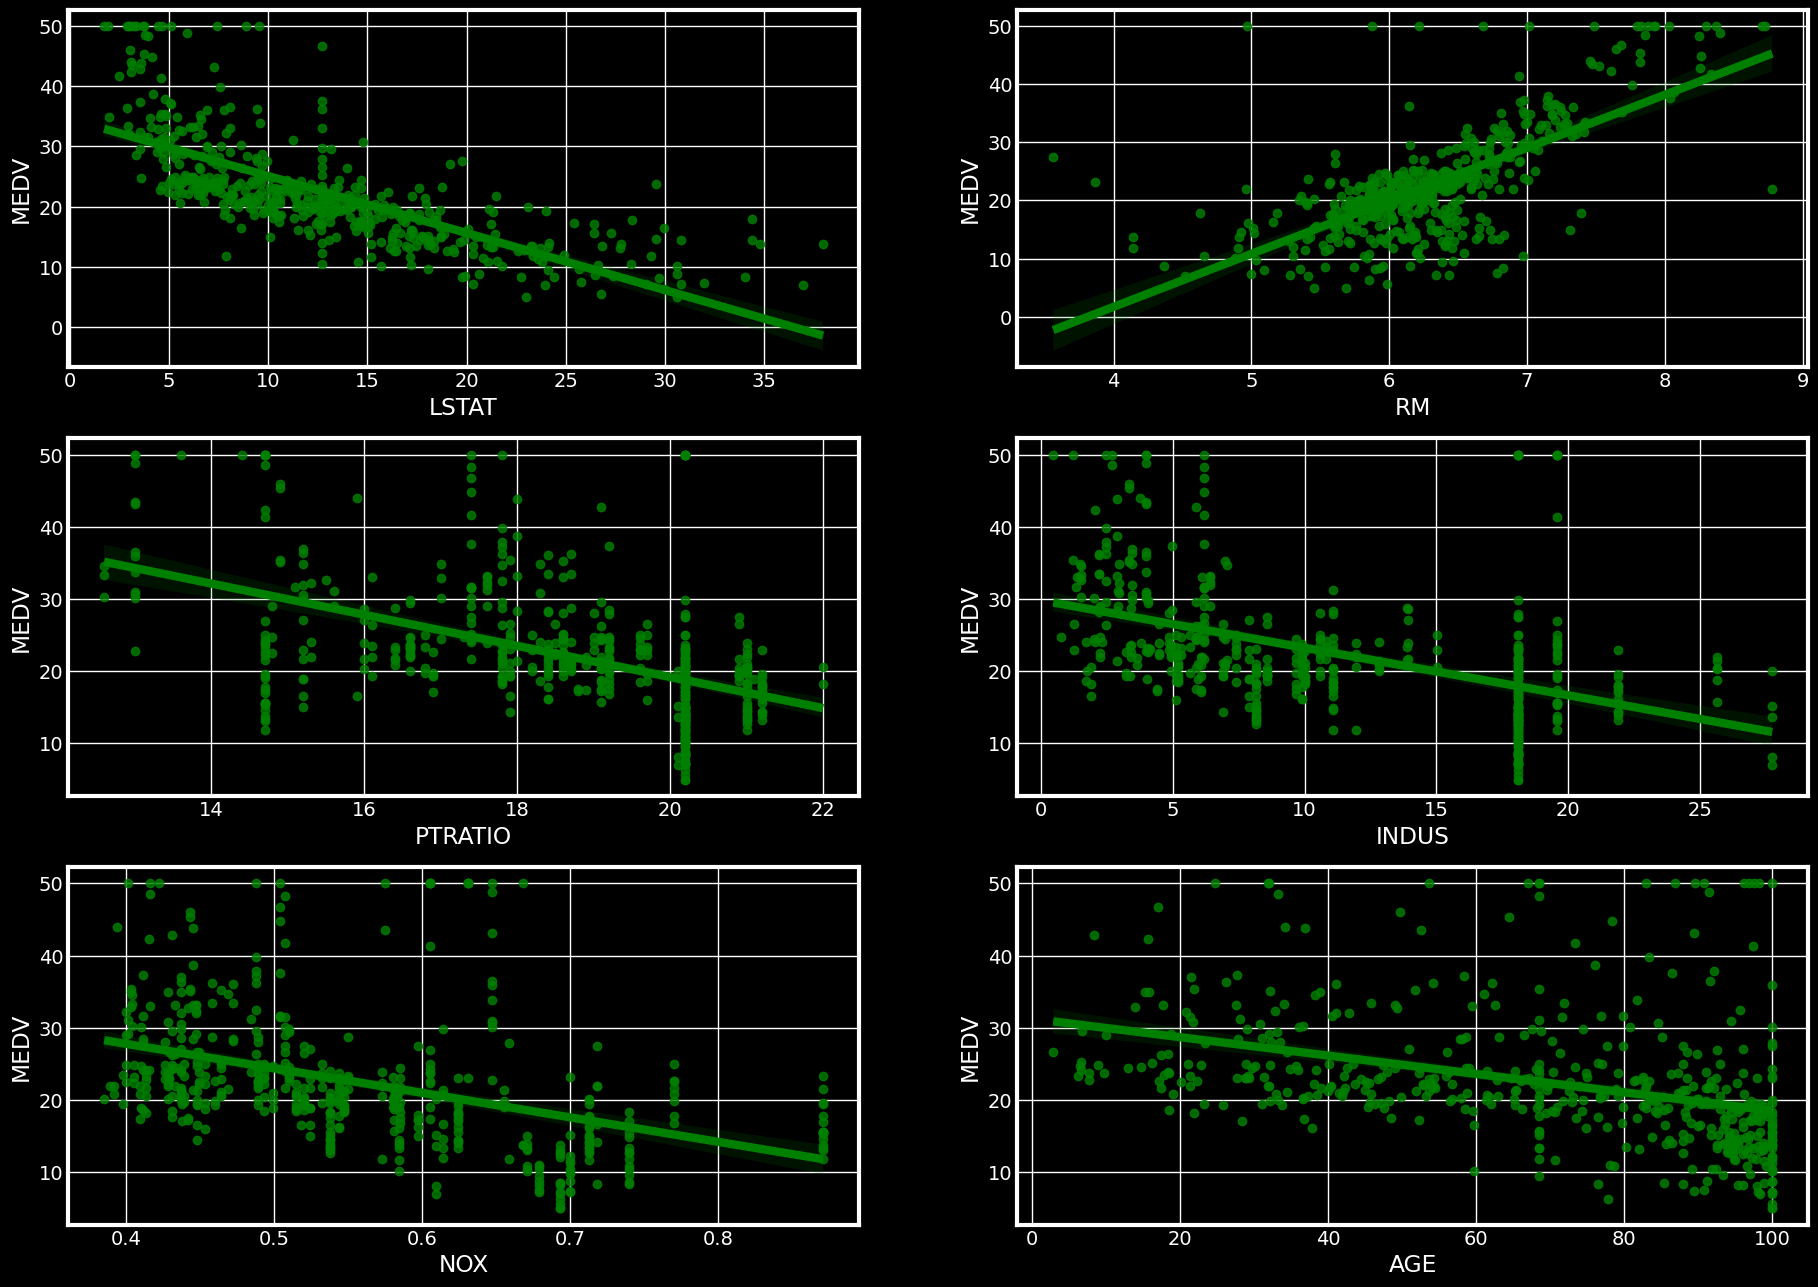

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(3, 2, figsize=(20, 15))
columns = ["LSTAT", "RM", "PTRATIO", "INDUS", "NOX", "AGE"]
k = 0
for i in range(3):
    for j in range(2):
        sns.regplot(x=data[columns[k]], y=data["MEDV"], ax=ax1[i][j], color="green")
        ax1[i][j].grid(True)
        k += 1
plt.show()

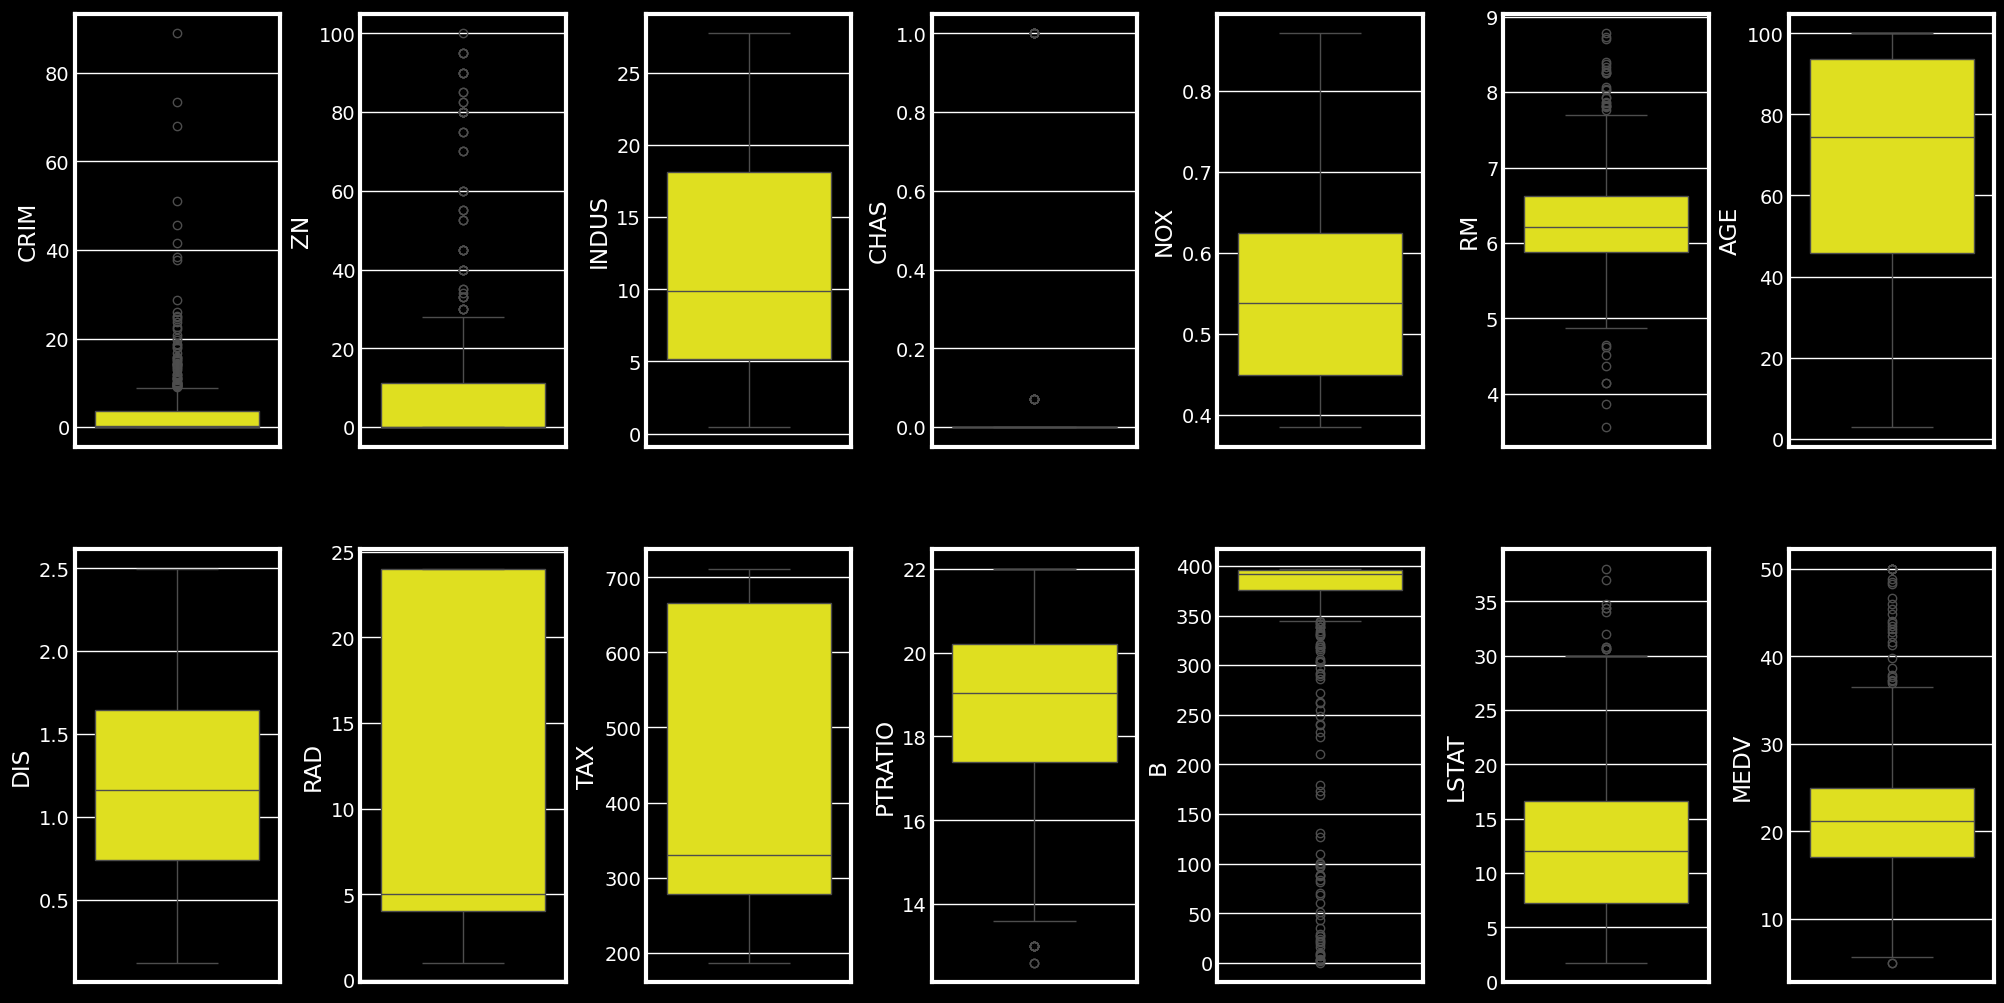

Column CRIM outliers = 12.65%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.00%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 2.37%
Column MEDV outliers = 7.91%


In [11]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index],color="yellow")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

In [12]:
X=data.iloc[:,0:13]
Y=data.iloc[:,13]

print("Unscaled Data: \n")
display(X)  #Unscaled data
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("Scaled Data: \n")
display(X)  #Scaled input data

Unscaled Data: 



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,1.408545,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,1.602836,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,1.602836,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,1.802073,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,1.802073,3,222,18.7,396.90,12.715432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,0.907694,1,273,21.0,391.99,12.715432
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,0.827460,1,273,21.0,396.90,9.080000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,0.773574,1,273,21.0,396.90,5.640000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,0.870833,1,273,21.0,393.45,6.480000


Scaled Data: 



array([[-0.42232846,  0.29644292, -1.31101039, ..., -1.45900038,
         0.44105193, -1.10414593],
       [-0.41986984, -0.48963852, -0.5997709 , ..., -0.30309415,
         0.44105193, -0.51035272],
       [-0.41987219, -0.48963852, -0.5997709 , ..., -0.30309415,
         0.39642699, -1.23974774],
       ...,
       [-0.41595175, -0.48963852,  0.1264106 , ...,  1.17646583,
         0.44105193, -1.00993835],
       [-0.41023216, -0.48963852,  0.1264106 , ...,  1.17646583,
         0.4032249 , -0.8900378 ],
       [-0.41751548, -0.48963852,  0.1264106 , ...,  1.17646583,
         0.44105193, -0.69020355]])

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=94)

In [14]:
xgbr = xgb.XGBRegressor(objective='reg:squarederror')  #Our XGBoost model
xgbr.fit(X_train,Y_train)

#Generate predicted values
Y_pred = xgbr.predict(X_test)

#Calculate and print the RMSE and the accuracy of our model.
mse=mean_squared_error(Y_test, Y_pred)
score=r2_score(Y_test,Y_pred)
print("Root Mean Square Error: %.2f" % (mse**(0.5)))
print("Accuracy: {} %".format(round((score*100),2)))

Root Mean Square Error: 2.85
Accuracy: 90.87 %


### hyperparameter tuning

In [15]:
xgbr = xgb.XGBRegressor(objective='reg:squarederror',
                        random_state=50,
                        max_depth=6,
                        learning_rate = 0.08,
                        n_estimators = 500,
                        colsample_bylevel = 0.4,
                        reg_alpha = 1,
                        subsample = 1,
                       )

xgbr.fit(X_train,Y_train)
Y_pred = xgbr.predict(X_test)
mse=mean_squared_error(Y_test, Y_pred)
score=r2_score(Y_test,Y_pred)
print("Root Mean Square Error: %.2f" % (mse**(0.5)))
print("Accuracy: {} %".format(round((score*100),2)))

Root Mean Square Error: 2.56
Accuracy: 92.66 %


In [16]:
params = { 'max_depth': [6,10],
           'learning_rate': [0.01, 0.08],
           'colsample_bylevel': [0.3, 0.4],
         }

xgbr = xgb.XGBRegressor(seed=50)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train, Y_train)

print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(0.5))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'colsample_bylevel': 0.3, 'learning_rate': 0.08, 'max_depth': 6}
Lowest RMSE:  3.749371577673614


In [17]:
mse_dict={}  #Root mean square dictionary
acc_dict={}  #Accuracy dictionary
for n in range(100):
    xgbr = xgb.XGBRegressor(objective='reg:squarederror',
                            random_state=n,
                            max_depth=6,
                            learning_rate = 0.08,
                            n_estimators = 500,
                            colsample_bylevel = 0.4,
                            reg_alpha = 1
                           )
    xgbr.fit(X_train, Y_train)
    Y_pred = xgbr.predict(X_test)
    mse=mean_squared_error(Y_test, Y_pred)
    score=r2_score(Y_test, Y_pred)
    mse_dict.update({n:mse**(1/2.0)})
    acc_dict.update({n:round((score*100),2)})

In [18]:
#Mean Square Error
lowest=min(mse_dict.values())
res = [key for key in mse_dict if mse_dict[key] == lowest]
mse_list=mse_dict.items()
k,v = zip(*mse_list) 
print("RMSE is lowest at {} for random state {} ".format(round((lowest),3),res))


RMSE is lowest at 2.365 for random state [88] 


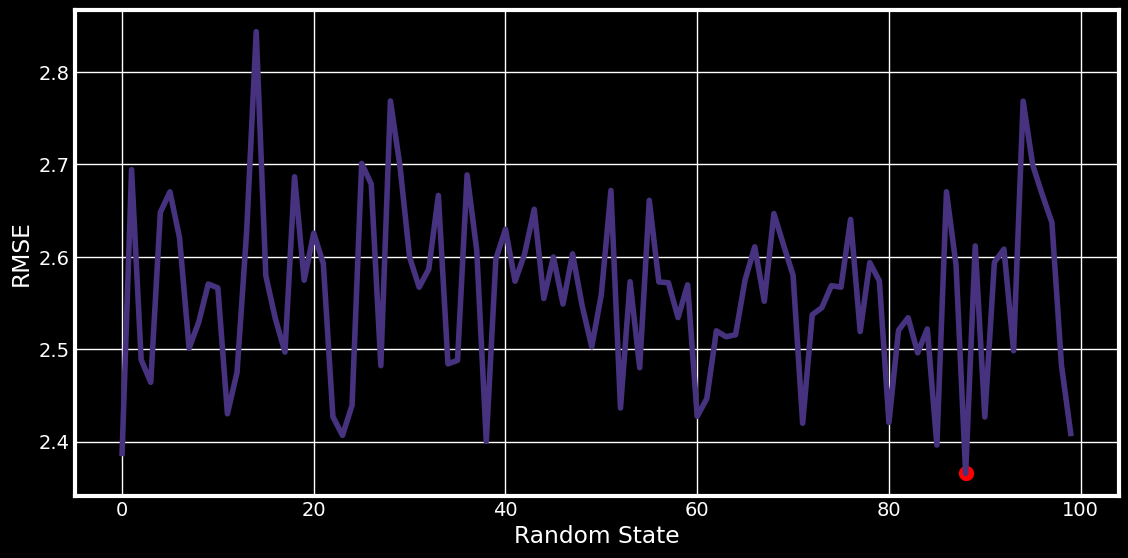

In [19]:
#Plot RMSE values
plt.figure(figsize=(12,6))
plt.plot(k,v)
plt.scatter(res,lowest,color="red",lw=5)
plt.xlabel("Random State")
plt.ylabel("RMSE")
plt.grid(True)
plt.show()


In [20]:
#Accuracy
highest=max(acc_dict.values())
res1= [key for key in acc_dict if acc_dict[key] == highest]
acc_list=acc_dict.items()
k1,v1=zip(*acc_list)
print("Accuracy is highest at {} % for random state {} ".format(highest,res1))


Accuracy is highest at 93.73 % for random state [88] 


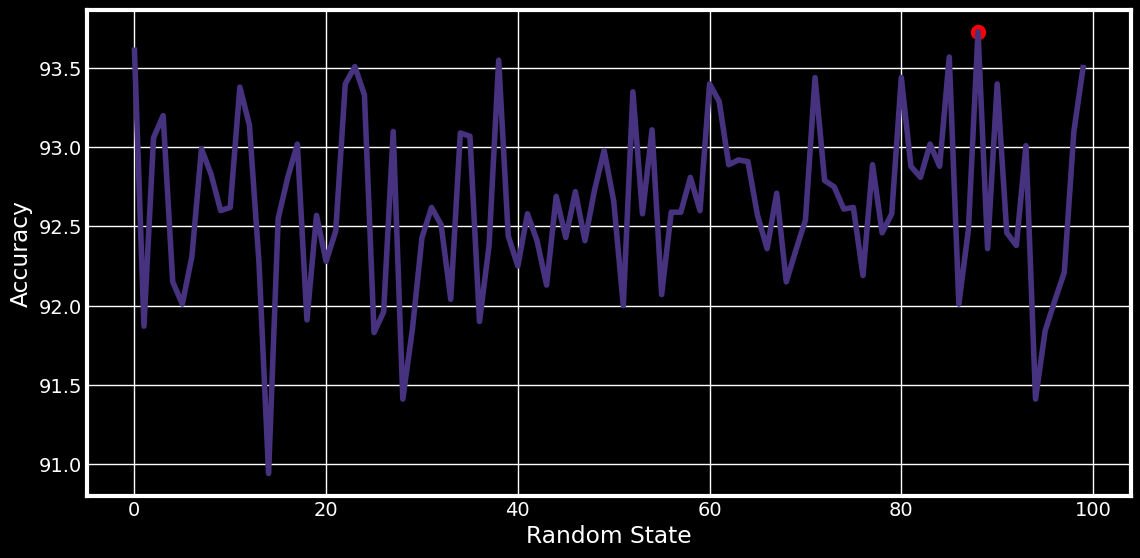

In [21]:
#Plot Accuracy values
plt.figure(figsize=(12,6))
plt.plot(k1,v1)
plt.scatter(res1,highest,color="red",lw=5)
plt.xlabel("Random State")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


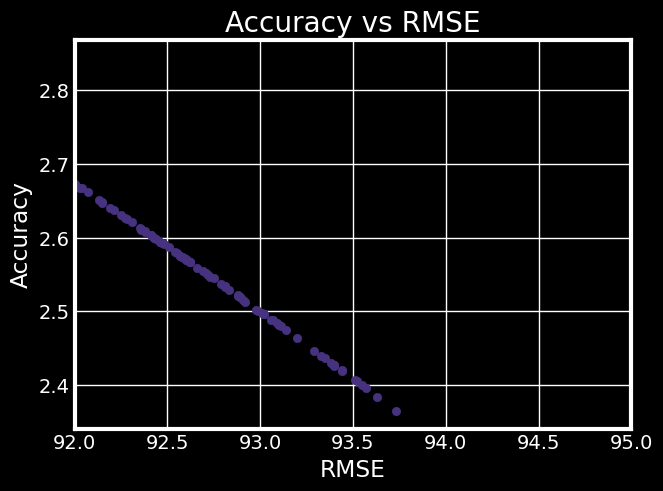

In [22]:

#Plot accuracy vs RMSE
plt.scatter(v1,v)
plt.xlabel("RMSE")
plt.ylabel("Accuracy")
plt.title("Accuracy vs RMSE")
plt.xlim(92,95)
plt.grid(True)
plt.show()